**⚠️ IMPORTANT: Select the Correct Kernel**

Before running this notebook, click on the kernel selector (top right) and choose:
- **"Python (XAI-CF)"** - This is your virtual environment with all required packages

If you don't see this option:
1. Open terminal in VS Code
2. Run: `source venv/bin/activate && python -m ipykernel install --user --name=xai-cf --display-name="Python (XAI-CF)"`
3. Reload VS Code
4. Select the "Python (XAI-CF)" kernel

---

# MovieLens 1M Dataset - Loading and Exploration

This notebook downloads, cleans, and explores the MovieLens 1M dataset for XAI collaborative filtering.

**Dataset:** MovieLens 1M
- 1 million ratings
- 6,000 users
- 4,000 movies
- User demographics (age, gender, occupation)
- Movie metadata (title, genres, year)

---

## 1. Setup and Imports

Import all required libraries for data loading and analysis.

In [1]:
# Standard libraries
import sys
import os
from pathlib import Path

# Add src to path
sys.path.append(str(Path().absolute().parent))

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Custom data loader
from src.data_loader import MovieLensDataLoader

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Plotting settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Set figure size default
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ All libraries imported successfully!")
print(f"✓ Working directory: {Path().absolute()}")

✓ All libraries imported successfully!
✓ Working directory: /Users/sameenmubashar/Desktop/Sameen/xai-collaborative-filtering/notebooks


## 2. Download and Load Dataset

Initialize the data loader and download MovieLens 1M dataset.

In [2]:
# Initialize data loader for MovieLens 1M
loader = MovieLensDataLoader(dataset_size='1m', data_dir='../data/raw')

print("✓ Data loader initialized")
print(f"Dataset: MovieLens {loader.dataset_size.upper()}")
print(f"Data directory: {loader.data_dir}")

✓ Data loader initialized
Dataset: MovieLens 1M
Data directory: ../data/raw


In [3]:
# Download dataset (will skip if already downloaded)
extract_dir = loader.download_dataset()
print(f"\n✓ Dataset ready at: {extract_dir}")

✓ Dataset ml-1m already exists at ../data/raw/ml-1m

✓ Dataset ready at: ../data/raw/ml-1m


### 2.1 Load Ratings Data

In [4]:
# Load ratings
ratings_df = loader.load_ratings()

print(f"\nRatings DataFrame shape: {ratings_df.shape}")
print(f"Columns: {list(ratings_df.columns)}")
print(f"\nData types:")
print(ratings_df.dtypes)
print(f"\nFirst 5 rows:")
ratings_df.head()

✓ Dataset ml-1m already exists at ../data/raw/ml-1m

Loading ratings from ../data/raw/ml-1m/ratings.dat...
✓ Loaded 1,000,209 ratings

Ratings DataFrame shape: (1000209, 4)
Columns: ['user_id', 'movie_id', 'rating', 'timestamp']

Data types:
user_id               int64
movie_id              int64
rating                int64
timestamp    datetime64[ns]
dtype: object

First 5 rows:


,user_id,movie_id,rating,timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


### 2.2 Load Movies Data

In [5]:
# Load movies
movies_df = loader.load_movies()

print(f"\nMovies DataFrame shape: {movies_df.shape}")
print(f"Columns: {list(movies_df.columns)}")
print(f"\nData types:")
print(movies_df.dtypes)
print(f"\nFirst 5 rows:")
movies_df.head()

Loading movies from ../data/raw/ml-1m/movies.dat...
✓ Loaded 3,883 movies

Movies DataFrame shape: (3883, 5)
Columns: ['movie_id', 'title', 'genres', 'year', 'genre_list']

Data types:
movie_id       int64
title         object
genres        object
year           int64
genre_list    object
dtype: object

First 5 rows:


,movie_id,title,genres,year,genre_list
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),Comedy,1995,[Comedy]


### 2.3 Load Users Data

In [6]:
# Load users
users_df = loader.load_users()

if users_df is not None:
    print(f"\nUsers DataFrame shape: {users_df.shape}")
    print(f"Columns: {list(users_df.columns)}")
    print(f"\nData types:")
    print(users_df.dtypes)
    print(f"\nFirst 5 rows:")
    display(users_df.head())
else:
    print("No user demographic data available for this dataset")

Loading users from ../data/raw/ml-1m/users.dat...
✓ Loaded 6,040 users

Users DataFrame shape: (6040, 7)
Columns: ['user_id', 'gender', 'age', 'occupation', 'zip_code', 'age_group', 'occupation_name']

Data types:
user_id             int64
gender             object
age                 int64
occupation          int64
zip_code           object
age_group          object
occupation_name    object
dtype: object

First 5 rows:


,user_id,gender,age,occupation,zip_code,age_group,occupation_name
0,1,F,1,10,48067,Under 18,K-12 student
1,2,M,56,16,70072,56+,self-employed
2,3,M,25,15,55117,25-34,scientist
3,4,M,45,7,02460,45-49,executive/managerial
4,5,M,25,20,55455,25-34,writer


### 2.4 Create Merged Dataset

In [7]:
# Create merged dataset with all information
merged_df = loader.create_merged_dataset()

print(f"\nMerged DataFrame shape: {merged_df.shape}")
print(f"Columns: {list(merged_df.columns)}")
print(f"\nFirst 5 rows:")
merged_df.head()


Merging datasets...
✓ Created merged dataset with 1,000,209 records

Merged DataFrame shape: (1000209, 14)
Columns: ['user_id', 'movie_id', 'rating', 'timestamp', 'title', 'genres', 'year', 'genre_list', 'gender', 'age', 'occupation', 'zip_code', 'age_group', 'occupation_name']

First 5 rows:


,user_id,movie_id,rating,timestamp,title,genres,year,genre_list,gender,age,occupation,zip_code,age_group,occupation_name
0,1,1193,5,2000-12-31 22:12:40,One Flew Over the Cuckoo's Nest (1975),Drama,1975,[Drama],F,1,10,48067,Under 18,K-12 student
1,1,661,3,2000-12-31 22:35:09,James and the Giant Peach (1996),Animation|Children's|Musical,1996,"[Animation, Children's, Musical]",F,1,10,48067,Under 18,K-12 student
2,1,914,3,2000-12-31 22:32:48,My Fair Lady (1964),Musical|Romance,1964,"[Musical, Romance]",F,1,10,48067,Under 18,K-12 student
3,1,3408,4,2000-12-31 22:04:35,Erin Brockovich (2000),Drama,2000,[Drama],F,1,10,48067,Under 18,K-12 student
4,1,2355,5,2001-01-06 23:38:11,"Bug's Life, A (1998)",Animation|Children's|Comedy,1998,"[Animation, Children's, Comedy]",F,1,10,48067,Under 18,K-12 student


## 3. Dataset Statistics

Comprehensive overview of the dataset.

In [8]:
# Print statistics
loader.print_statistics()


MovieLens 1M Dataset Statistics
Total Ratings:       1,000,209
Unique Users:        6,040
Unique Movies:       3,706
Rating Range:        1 - 5
Average Rating:      3.58
Sparsity:            95.53%
Date Range:          2000-04-25 to 2003-02-28
Ratings per User:    165.6
Ratings per Movie:   269.9


In [9]:
# Check for missing values
print("Missing Values:")
print("="*60)
print(merged_df.isnull().sum())
print(f"\nTotal missing values: {merged_df.isnull().sum().sum()}")
print(f"Percentage of missing data: {(merged_df.isnull().sum().sum() / merged_df.size) * 100:.2f}%")

Missing Values:
user_id            0
movie_id           0
rating             0
timestamp          0
title              0
genres             0
year               0
genre_list         0
gender             0
age                0
occupation         0
zip_code           0
age_group          0
occupation_name    0
dtype: int64

Total missing values: 0
Percentage of missing data: 0.00%


## 4. Exploratory Data Analysis

Visualize and analyze the dataset characteristics.

### 4.1 Ratings Distribution

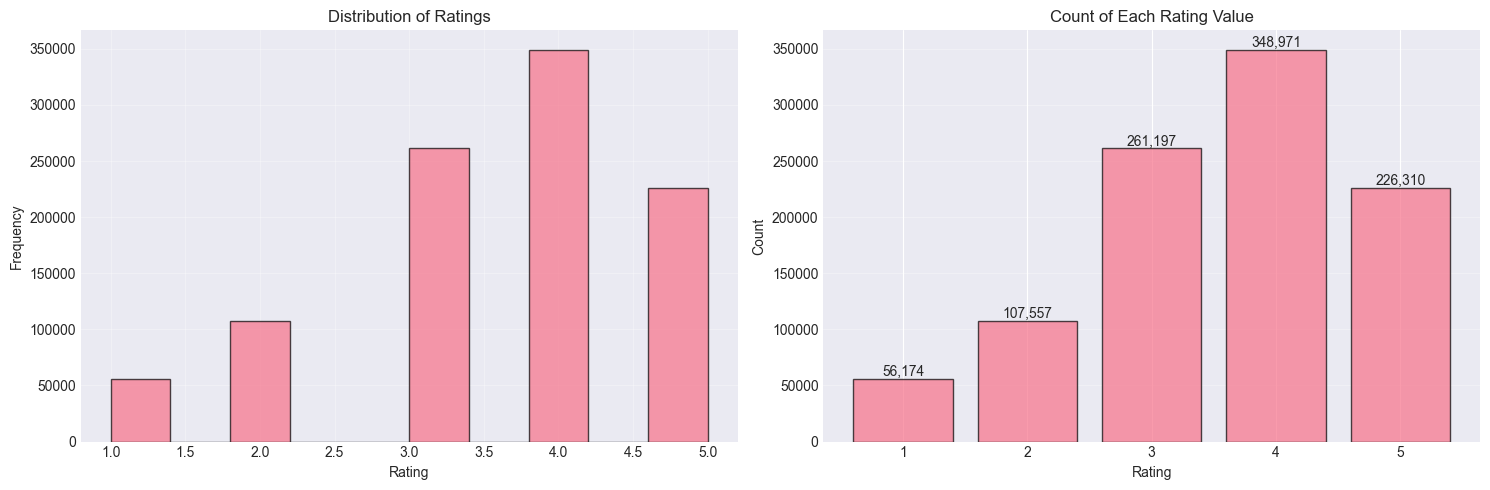


Rating Statistics:
count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


In [10]:
# Ratings distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(merged_df['rating'], bins=10, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Ratings')
axes[0].grid(True, alpha=0.3)

# Count plot
rating_counts = merged_df['rating'].value_counts().sort_index()
axes[1].bar(rating_counts.index, rating_counts.values, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Count')
axes[1].set_title('Count of Each Rating Value')
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (rating, count) in enumerate(rating_counts.items()):
    axes[1].text(rating, count, f'{count:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Statistics
print("\nRating Statistics:")
print(merged_df['rating'].describe())

### 4.2 User Activity Analysis

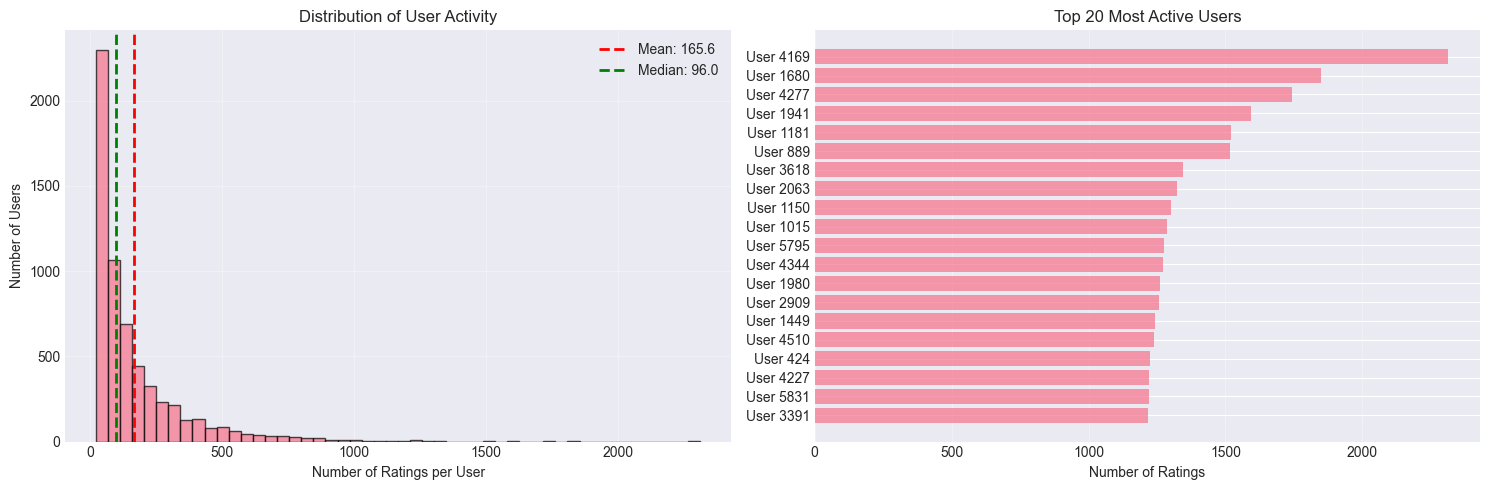


User Activity Statistics:
count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
dtype: float64


In [11]:
# Ratings per user
ratings_per_user = merged_df.groupby('user_id').size()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of ratings per user
axes[0].hist(ratings_per_user, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Ratings per User')
axes[0].set_ylabel('Number of Users')
axes[0].set_title('Distribution of User Activity')
axes[0].axvline(ratings_per_user.mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {ratings_per_user.mean():.1f}')
axes[0].axvline(ratings_per_user.median(), color='green', linestyle='--', 
                linewidth=2, label=f'Median: {ratings_per_user.median():.1f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Top 20 most active users
top_users = ratings_per_user.nlargest(20)
axes[1].barh(range(len(top_users)), top_users.values, alpha=0.7)
axes[1].set_yticks(range(len(top_users)))
axes[1].set_yticklabels([f'User {uid}' for uid in top_users.index])
axes[1].set_xlabel('Number of Ratings')
axes[1].set_title('Top 20 Most Active Users')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\nUser Activity Statistics:")
print(ratings_per_user.describe())

### 4.3 Movie Popularity Analysis

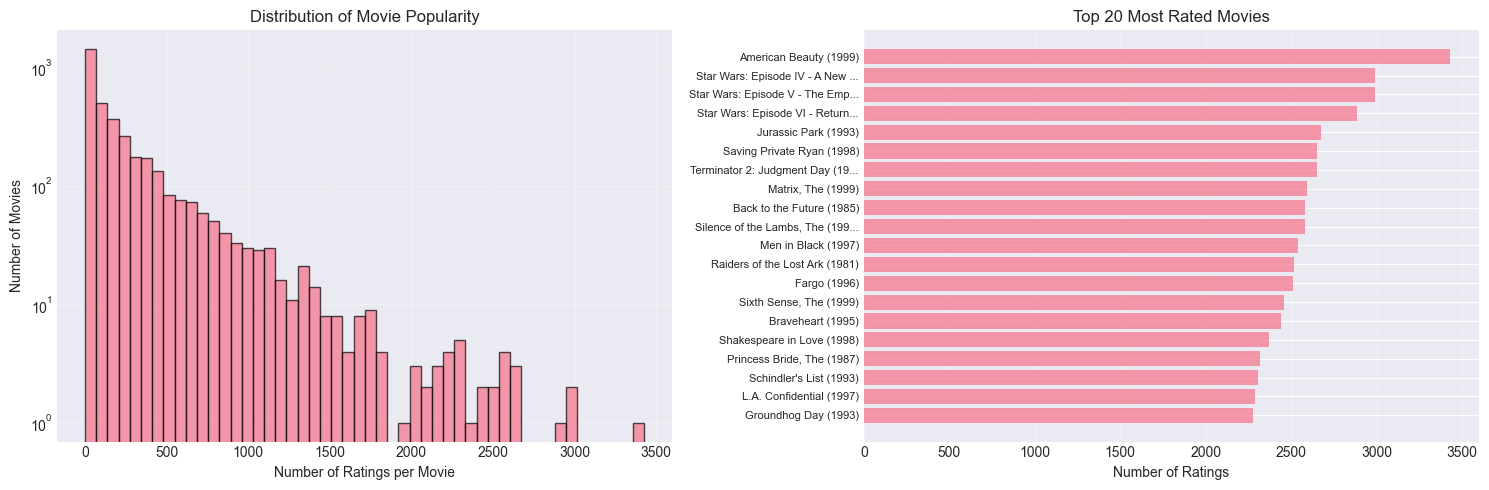


Movie Popularity Statistics:
count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: num_ratings, dtype: float64

Top 10 Most Rated Movies:
                                                  title  num_ratings
2651                             American Beauty (1999)         3428
253           Star Wars: Episode IV - A New Hope (1977)         2991
1106  Star Wars: Episode V - The Empire Strikes Back...         2990
1120  Star Wars: Episode VI - Return of the Jedi (1983)         2883
466                                Jurassic Park (1993)         2672
1848                         Saving Private Ryan (1998)         2653
575                   Terminator 2: Judgment Day (1991)         2649
2374                                 Matrix, The (1999)         2590
1178                          Back to the Future (1985)         2583
579                    Silence of the Lambs, The (1

In [12]:
# Ratings per movie
ratings_per_movie = merged_df.groupby(['movie_id', 'title']).size().reset_index(name='num_ratings')
ratings_per_movie = ratings_per_movie.sort_values('num_ratings', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of ratings per movie
axes[0].hist(ratings_per_movie['num_ratings'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Ratings per Movie')
axes[0].set_ylabel('Number of Movies')
axes[0].set_title('Distribution of Movie Popularity')
axes[0].set_yscale('log')
axes[0].grid(True, alpha=0.3)

# Top 20 most rated movies
top_movies = ratings_per_movie.head(20)
axes[1].barh(range(len(top_movies)), top_movies['num_ratings'].values, alpha=0.7)
axes[1].set_yticks(range(len(top_movies)))
axes[1].set_yticklabels([title[:30] + '...' if len(title) > 30 else title 
                          for title in top_movies['title']], fontsize=8)
axes[1].set_xlabel('Number of Ratings')
axes[1].set_title('Top 20 Most Rated Movies')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\nMovie Popularity Statistics:")
print(ratings_per_movie['num_ratings'].describe())
print(f"\nTop 10 Most Rated Movies:")
print(ratings_per_movie[['title', 'num_ratings']].head(10))

### 4.4 Genre Analysis

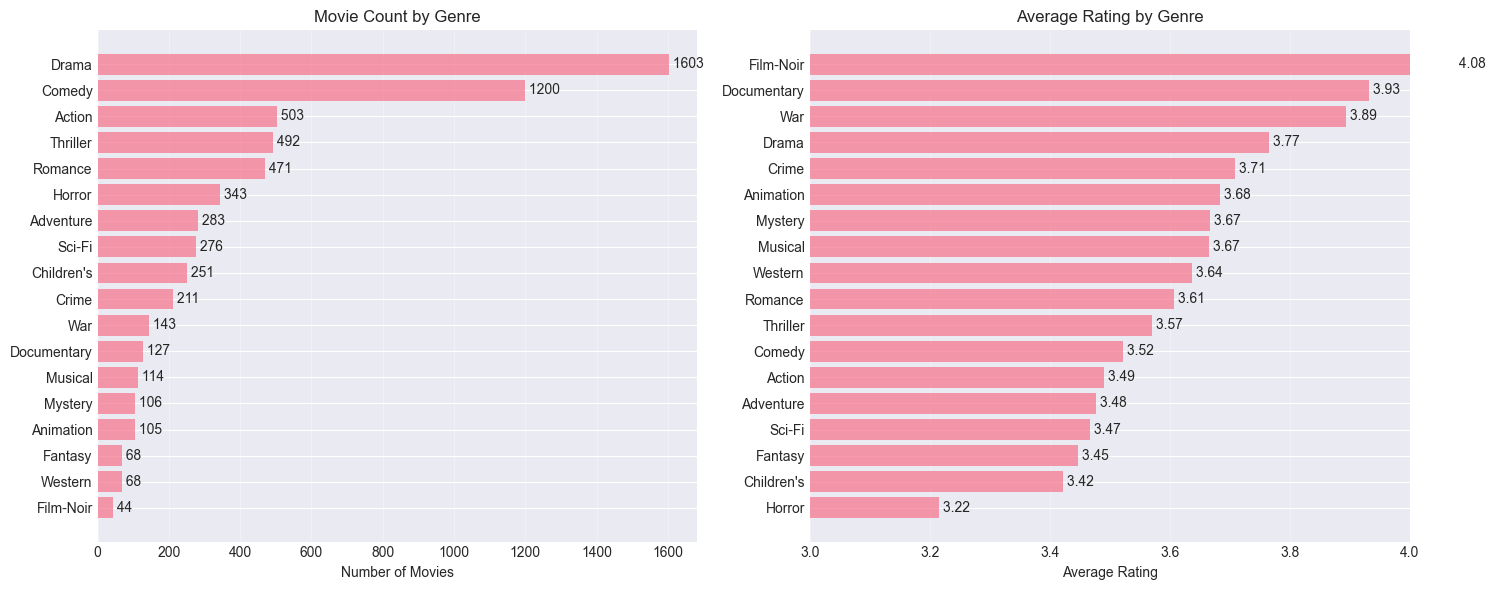


Genre Statistics:
Total unique genres: 18

Genre counts:
Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
Name: count, dtype: int64


In [13]:
# Extract all genres
all_genres = []
for genres in movies_df['genre_list'].dropna():
    all_genres.extend(genres)

genre_counts = pd.Series(all_genres).value_counts()

# Genre distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
axes[0].barh(range(len(genre_counts)), genre_counts.values, alpha=0.7)
axes[0].set_yticks(range(len(genre_counts)))
axes[0].set_yticklabels(genre_counts.index)
axes[0].set_xlabel('Number of Movies')
axes[0].set_title('Movie Count by Genre')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

# Add value labels
for i, count in enumerate(genre_counts.values):
    axes[0].text(count, i, f' {count}', va='center')

# Average rating by genre
genre_ratings = []
for genre in genre_counts.index:
    genre_mask = merged_df['genres'].str.contains(genre, na=False)
    avg_rating = merged_df[genre_mask]['rating'].mean()
    genre_ratings.append(avg_rating)

genre_rating_df = pd.DataFrame({
    'genre': genre_counts.index,
    'avg_rating': genre_ratings
}).sort_values('avg_rating', ascending=False)

axes[1].barh(range(len(genre_rating_df)), genre_rating_df['avg_rating'].values, alpha=0.7)
axes[1].set_yticks(range(len(genre_rating_df)))
axes[1].set_yticklabels(genre_rating_df['genre'])
axes[1].set_xlabel('Average Rating')
axes[1].set_title('Average Rating by Genre')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].set_xlim([3.0, 4.0])
axes[1].invert_yaxis()

# Add value labels
for i, rating in enumerate(genre_rating_df['avg_rating'].values):
    axes[1].text(rating, i, f' {rating:.2f}', va='center')

plt.tight_layout()
plt.show()

print("\nGenre Statistics:")
print(f"Total unique genres: {len(genre_counts)}")
print(f"\nGenre counts:")
print(genre_counts)

### 4.5 User Demographics Analysis

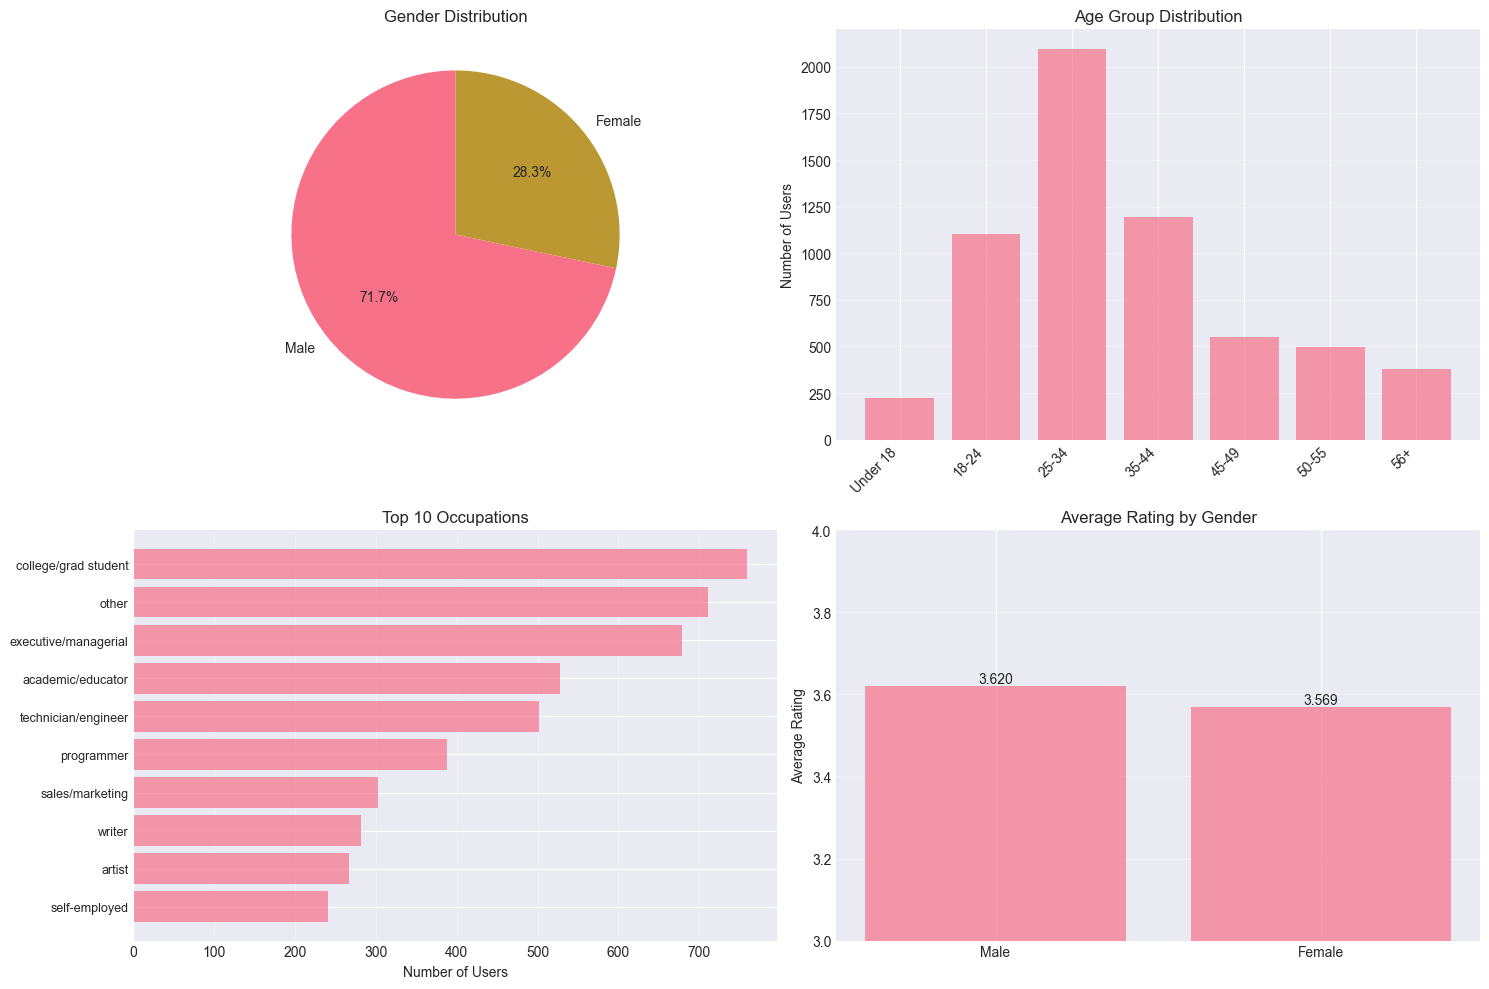


User Demographics Summary:
Gender distribution:
gender
M    4331
F    1709
Name: count, dtype: int64

Age distribution:
age_group
Under 18     222
18-24       1103
25-34       2096
35-44       1193
45-49        550
50-55        496
56+          380
Name: count, dtype: int64


In [14]:
if users_df is not None:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Gender distribution
    gender_counts = users_df['gender'].value_counts()
    axes[0, 0].pie(gender_counts.values, labels=['Male' if g == 'M' else 'Female' for g in gender_counts.index],
                    autopct='%1.1f%%', startangle=90)
    axes[0, 0].set_title('Gender Distribution')
    
    # Age distribution
    age_order = ["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"]
    age_counts = users_df['age_group'].value_counts().reindex(age_order, fill_value=0)
    axes[0, 1].bar(range(len(age_counts)), age_counts.values, alpha=0.7)
    axes[0, 1].set_xticks(range(len(age_counts)))
    axes[0, 1].set_xticklabels(age_counts.index, rotation=45, ha='right')
    axes[0, 1].set_ylabel('Number of Users')
    axes[0, 1].set_title('Age Group Distribution')
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    
    # Top occupations
    occupation_counts = users_df['occupation_name'].value_counts().head(10)
    axes[1, 0].barh(range(len(occupation_counts)), occupation_counts.values, alpha=0.7)
    axes[1, 0].set_yticks(range(len(occupation_counts)))
    axes[1, 0].set_yticklabels(occupation_counts.index, fontsize=9)
    axes[1, 0].set_xlabel('Number of Users')
    axes[1, 0].set_title('Top 10 Occupations')
    axes[1, 0].grid(True, alpha=0.3, axis='x')
    axes[1, 0].invert_yaxis()
    
    # Rating distribution by gender
    gender_ratings = merged_df.groupby('gender')['rating'].mean()
    axes[1, 1].bar(['Male', 'Female'], gender_ratings.values, alpha=0.7)
    axes[1, 1].set_ylabel('Average Rating')
    axes[1, 1].set_title('Average Rating by Gender')
    axes[1, 1].set_ylim([3.0, 4.0])
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, rating in enumerate(gender_ratings.values):
        axes[1, 1].text(i, rating, f'{rating:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print("\nUser Demographics Summary:")
    print(f"Gender distribution:\n{gender_counts}")
    print(f"\nAge distribution:\n{age_counts}")
else:
    print("No demographic data available for analysis")

### 4.6 Temporal Analysis

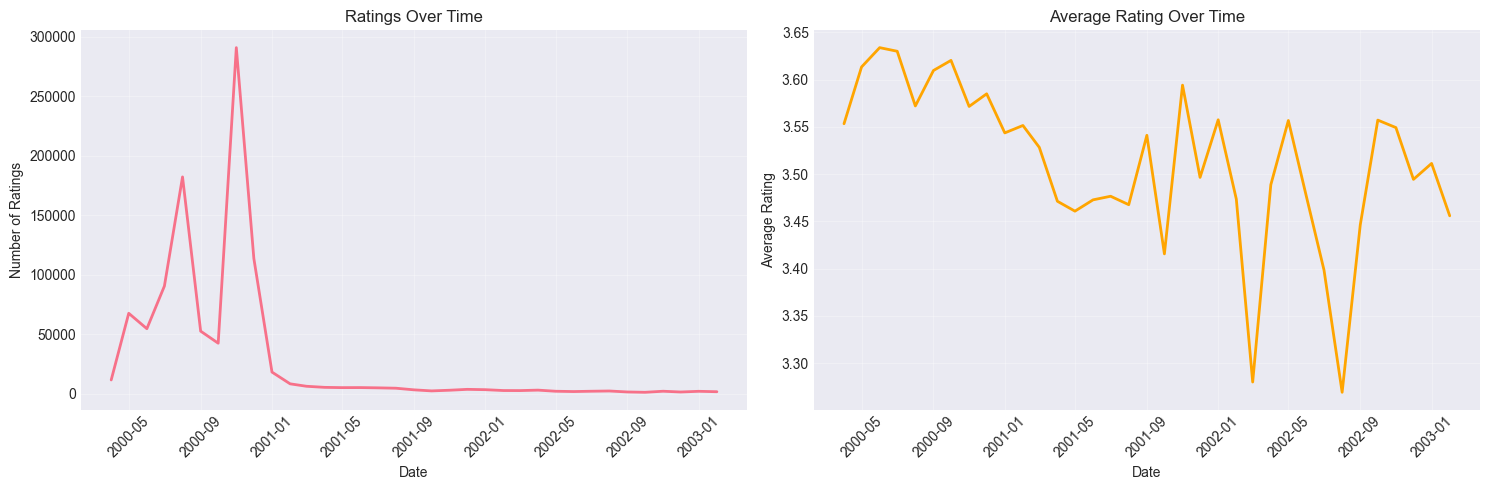


Temporal Statistics:
Date range: 2000-04-25 23:05:32 to 2003-02-28 17:49:50
Total duration: 1038 days


In [15]:
# Ratings over time
merged_df['year_month'] = merged_df['timestamp'].dt.to_period('M')
ratings_over_time = merged_df.groupby('year_month').size()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Ratings over time
axes[0].plot(ratings_over_time.index.to_timestamp(), ratings_over_time.values, linewidth=2)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Ratings')
axes[0].set_title('Ratings Over Time')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Average rating over time
avg_rating_over_time = merged_df.groupby('year_month')['rating'].mean()
axes[1].plot(avg_rating_over_time.index.to_timestamp(), avg_rating_over_time.values, 
             linewidth=2, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Average Rating Over Time')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"\nTemporal Statistics:")
print(f"Date range: {merged_df['timestamp'].min()} to {merged_df['timestamp'].max()}")
print(f"Total duration: {(merged_df['timestamp'].max() - merged_df['timestamp'].min()).days} days")

## 5. Save Processed Data

Save cleaned and processed datasets for future use.

In [16]:
# Save processed data
loader.save_processed_data(output_dir='../data/processed')

print("\n✓ All processed data saved successfully!")

✓ Saved ratings to ../data/processed/ratings_1m.csv
✓ Saved movies to ../data/processed/movies_1m.csv
✓ Saved users to ../data/processed/users_1m.csv
✓ Saved merged dataset to ../data/processed/merged_1m.csv

✓ All processed data saved successfully!


## 6. Data Summary

Final summary of the dataset for reference.

In [17]:
print("="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"\n📊 Dataset: MovieLens {loader.dataset_size.upper()}")
print(f"\n✓ Ratings: {len(ratings_df):,} records")
print(f"✓ Movies: {len(movies_df):,} unique titles")
if users_df is not None:
    print(f"✓ Users: {len(users_df):,} unique users")
print(f"✓ Merged: {len(merged_df):,} records with full metadata")
print(f"\n📁 Data saved to: ../data/processed/")
print(f"\n✅ Dataset is ready for collaborative filtering and XAI analysis!")
print("="*60)

DATASET SUMMARY

📊 Dataset: MovieLens 1M

✓ Ratings: 1,000,209 records
✓ Movies: 3,883 unique titles
✓ Users: 6,040 unique users
✓ Merged: 1,000,209 records with full metadata

📁 Data saved to: ../data/processed/

✅ Dataset is ready for collaborative filtering and XAI analysis!


## Next Steps

1. **Data Preprocessing**: Normalize ratings, handle cold-start problems
2. **Feature Engineering**: Create user/movie features for XAI
3. **Model Training**: Implement SVD, KNN, or matrix factorization
4. **Add Explainability**: Integrate LIME/SHAP for model interpretability
5. **Evaluation**: Measure both accuracy and explanation quality

---

**Data Format Summary:**

- **Ratings**: `user_id`, `movie_id`, `rating` (1-5), `timestamp`
- **Movies**: `movie_id`, `title`, `genres`, `year`, `genre_list`
- **Users**: `user_id`, `gender`, `age`, `age_group`, `occupation`, `occupation_name`, `zip_code`
- **Merged**: All columns combined for comprehensive analysis